Conectado a base (Python 3.12.3)

In [ ]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
import pandas as pd

####instalar paquete !pip install keras-tuner
import keras_tuner as kt

In [ ]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
import pandas as pd

####instalar paquete !pip install keras-tuner
import keras_tuner as kt

In [ ]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')

x_train[0]

array([[[221, 174, 194],
        [224, 178, 203],
        [225, 180, 202],
        ...,
        [212, 156, 157],
        [211, 155, 154],
        [211, 154, 154]],

       [[224, 174, 197],
        [221, 173, 190],
        [222, 175, 188],
        ...,
        [216, 161, 166],
        [214, 158, 163],
        [212, 158, 157]],

       [[221, 173, 191],
        [219, 172, 188],
        [220, 170, 183],
        ...,
        [217, 160, 166],
        [212, 156, 161],
        [211, 156, 153]],

       ...,

       [[198, 154, 161],
        [200, 154, 158],
        [200, 149, 154],
        ...,
        [200, 147, 145],
        [202, 151, 157],
        [201, 148, 152]],

       [[197, 152, 153],
        [199, 154, 165],
        [193, 143, 142],
        ...,
        [204, 150, 155],
        [192, 142, 134],
        [200, 147, 149]],

       [[199, 149, 153],
        [199, 152, 156],
        [194, 146, 143],
        ...,
        [196, 145, 146],
        [197, 143, 144],
        [198, 147, 149]]

In [ ]:
x_train=x_train.astype('float32') ## para poder escalarlo
x_test=x_test.astype('float32') ## para poder escalarlo
x_train.max()
x_train.min()


x_train /=255 ### escalarlo para que quede entre 0 y 1, con base en el valor máximo
x_test /=255

In [ ]:
x_train.shape
x_test.shape

np.product(x_train[1].shape) ## cantidad de variables por imagen

np.unique(y_train, return_counts=True)
np.unique(y_test, return_counts=True)

(array([0, 1]), array([360, 300], dtype=int64))

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','Recall'])

In [ ]:
cnn_model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 31s 394ms/step - AUC: 0.5543 - Recall: 0.4794 - loss: 0.7422 - val_AUC: 0.7920 - val_Recall: 0.6267 - val_loss: 0.5355
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - AUC: 0.8134 - Recall: 0.6614 - loss: 0.5292 - val_AUC: 0.8411 - val_Recall: 0.5000 - val_loss: 0.5060
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - AUC: 0.8367 - Recall: 0.7025 - loss: 0.5009 - val_AUC: 0.8673 - val_Recall: 0.8433 - val_loss: 0.4392
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - AUC: 0.8506 - Recall: 0.7722 - loss: 0.4743 - val_AUC: 0.8769 - val_Recall: 0.4800 - val_loss: 0.4741
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - AUC: 0.8562 - Recall: 0.6442 - loss: 0.4742 - val_AUC: 0.8913 - val_Recall: 0.8567 - val_loss: 0.4107
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - AUC: 0.8922 - Recall: 0.8120 - loss: 0.4047 - val_AUC: 0.9012 - val_Recall: 0.6900 - val_loss: 0.3913
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - AUC: 0.90

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265,829 (12.46 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,177,220 (8.31 MB)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       360
           1       0.78      0.92      0.85       300

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.86      0.85      0.85       660



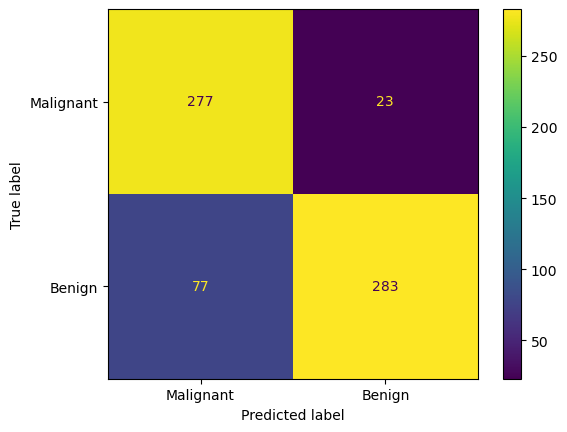

In [ ]:
pred_test1=(cnn_model.predict(x_test) >= 0.5).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Malignant', 'Benign'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))

In [ ]:
reg_strength = 0.001

###########Estrategias a usar: regilarization usar una a la vez para ver impacto
dropout_rate = 0.1  


In [ ]:
cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
cnn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC',"accuracy"])

In [ ]:
##Train the model for 10 epochs
cnn_model2.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 631ms/step - AUC: 0.5370 - accuracy: 0.5494 - loss: 0.9115 - val_AUC: 0.7441 - val_accuracy: 0.7091 - val_loss: 0.7190
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - AUC: 0.7673 - accuracy: 0.6894 - loss: 0.6489 - val_AUC: 0.7653 - val_accuracy: 0.6591 - val_loss: 0.6934
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - AUC: 0.7931 - accuracy: 0.7397 - loss: 0.5942 - val_AUC: 0.8051 - val_accuracy: 0.7758 - val_loss: 0.5798
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - AUC: 0.8229 - accuracy: 0.7509 - loss: 0.5474 - val_AUC: 0.8298 - val_accuracy: 0.7864 - val_loss: 0.5355
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - AUC: 0.8369 - accuracy: 0.7644 - loss: 0.5196 - val_AUC: 0.8334 - val_accuracy: 0.7682 - val_loss: 0.5483
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - AUC: 0.8639 - accuracy: 0.7839 - loss: 0.4797 - val_AUC: 0.8836 - val_accuracy: 0.8000 - val_loss: 0.4607
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 0.4498 - accuracy: 0.7930 - loss: 0.4101
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       360
           1       0.78      0.92      0.84       300

    accuracy                           0.84       660
   macro avg       0.85      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660

Test AUC: 0.842424213886261


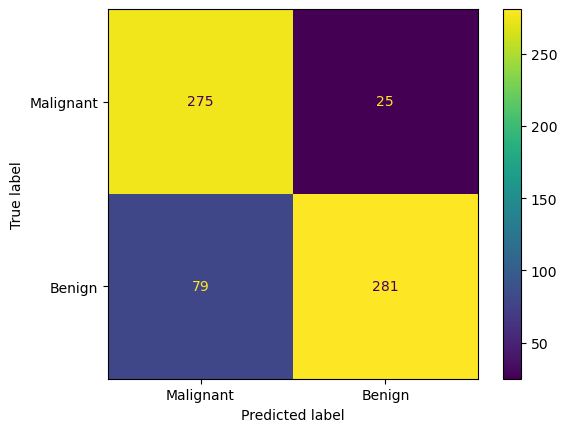

In [ ]:
test_loss, test_accuracy , test_auc=cnn_model2.evaluate(x_test, y_test)
pred_test1=(cnn_model2.predict(x_test) >= 0.5).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Malignant', 'Benign'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))
print(f"Test AUC: {test_auc}")

In [ ]:
hp = kt.HyperParameters()

def build_model(hp):
    
    dropout_rate=hp.Float('DO', min_value=0.05, max_value= 0.5, step=0.05)
    reg_strength = hp.Float("rs", min_value=0.0001, max_value=0.002, step=0.0001)
    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) ### en el contexto no se debería afinar
    
    model= tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
   
    model.compile(
        optimizer=opt, loss="binary_crossentropy", metrics=["Recall", "AUC"],
    )
    
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp,
    tune_new_entries=True, 
    objective=kt.Objective("Recall", direction="max"),
    max_trials=10,
    overwrite=True, 
)

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(x_train, y_train, epochs=30, validation_data=(x_test, y_test), batch_size=100)

Trial 10 Complete [00h 04m 04s]
Recall: 0.9289891123771667

Best Recall So Far: 0.9289891123771667
Total elapsed time: 00h 39m 03s


In [ ]:
fc_best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="Recall", direction="max")

Trial 09 summary
Hyperparameters:
DO: 0.05
rs: 0.0018000000000000002
optimizer: adam
Score: 0.9289891123771667

Trial 02 summary
Hyperparameters:
DO: 0.3
rs: 0.00030000000000000003
optimizer: adam
Score: 0.8947368264198303

Trial 05 summary
Hyperparameters:
DO: 0.2
rs: 0.0009000000000000001
optimizer: adam
Score: 0.883876383304596

Trial 00 summary
Hyperparameters:
DO: 0.1
rs: 0.0008
optimizer: sgd
Score: 0.6817042827606201

Trial 01 summary
Hyperparameters:
DO: 0.2
rs: 0.0014000000000000002
optimizer: sgd
Score: 0.6733500361442566

Trial 08 summary
Hyperparameters:
DO: 0.25
rs: 0.001
optimizer: sgd
Score: 0.5363408327102661

Trial 07 summary
Hyperparameters:
DO: 0.35000000000000003
rs: 0.0001
optimizer: adam
Score: 0.5313283205032349

Trial 06 summary
Hyperparameters:
DO: 0.45
rs: 0.0002
optimizer: adam
Score: 0.4544695019721985

Trial 04 summary
Hyperparameters:
DO: 0.45
rs

In [ ]:
fc_best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,609 (4.15 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hp = kt.HyperParameters()

def build_model(hp):
    
    dropout_rate=hp.Float('DO', min_value=0.05, max_value= 0.5, step=0.05)
    reg_strength = hp.Float("rs", min_value=0.0001, max_value=0.001, step=0.0001)
    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) ### en el contexto no se debería afinar
    
    model= tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
   
    model.compile(
        optimizer=opt, loss="binary_crossentropy", metrics=["Recall", "AUC"],
    )
    
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp,
    tune_new_entries=True, 
    objective=kt.Objective("Recall", direction="max"),
    max_trials=10,
    overwrite=True, 
)

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(x_train, y_train, epochs=30, validation_data=(x_test, y_test), batch_size=100)

Trial 10 Complete [00h 03m 41s]
Recall: 0.6608186960220337

Best Recall So Far: 0.9239766001701355
Total elapsed time: 00h 37m 26s


In [ ]:
fc_best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="Recall", direction="max")

Trial 04 summary
Hyperparameters:
DO: 0.4
rs: 0.0009000000000000001
optimizer: adam
Score: 0.9239766001701355

Trial 06 summary
Hyperparameters:
DO: 0.45
rs: 0.0002
optimizer: adam
Score: 0.8696742057800293

Trial 00 summary
Hyperparameters:
DO: 0.15000000000000002
rs: 0.0004
optimizer: adam
Score: 0.866332471370697

Trial 09 summary
Hyperparameters:
DO: 0.1
rs: 0.0005
optimizer: sgd
Score: 0.6608186960220337

Trial 01 summary
Hyperparameters:
DO: 0.1
rs: 0.0007000000000000001
optimizer: sgd
Score: 0.6507936716079712

Trial 02 summary
Hyperparameters:
DO: 0.1
rs: 0.0002
optimizer: sgd
Score: 0.6324143409729004

Trial 03 summary
Hyperparameters:
DO: 0.45
rs: 0.0005
optimizer: sgd
Score: 0.42355889081954956

Trial 08 summary
Hyperparameters:
DO: 0.4
rs: 0.0008
optimizer: sgd
Score: 0.390142023563385

Trial 05 summary
Hyperparameters:
DO: 0.3
rs: 0.0006000000000000001
optimizer:

In [ ]:
fc_best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,609 (4.15 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
fc_best_model.evaluate

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential, built=True>>

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - AUC: 0.4341 - Recall: 0.4647 - loss: 0.4123  
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       360
           1       0.78      0.92      0.84       300

    accuracy                           0.84       660
   macro avg       0.85      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660

Test AUC: 0.8941065073013306


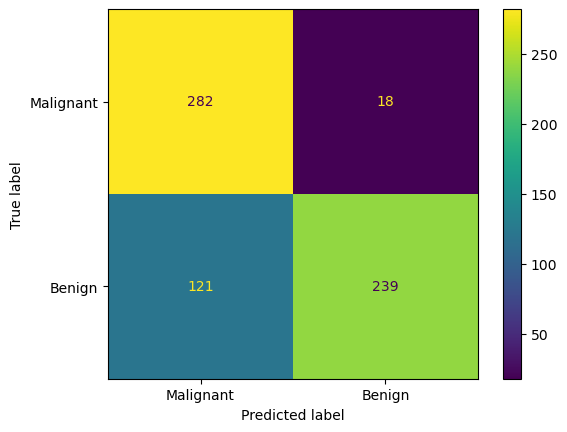

In [ ]:
test_loss, test_accuracy, test_auc=fc_best_model.evaluate(x_test, y_test)
pred_test=(fc_best_model.predict(x_test)>=0.5).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Malignant', 'Benign'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))
print(f"Test AUC: {test_auc}")

In [ ]:
from sklearn.metrics import roc_auc_score

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       360
           1       0.70      0.94      0.80       300

    accuracy                           0.79       660
   macro avg       0.81      0.80      0.79       660
weighted avg       0.83      0.79      0.79       660

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
AUC: 0.8945


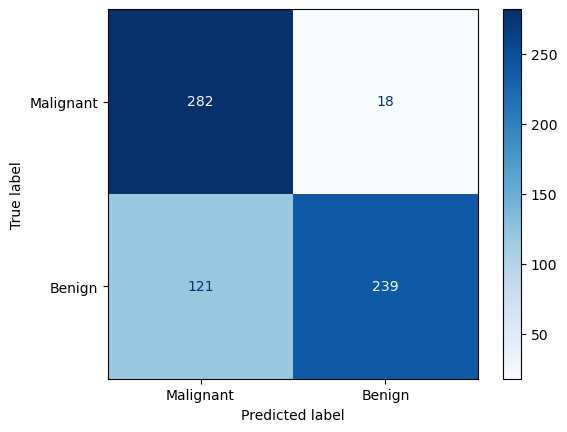

In [ ]:
import matplotlib.pyplot as plt
pred_test = (fc_best_model.predict(x_test) >= 0.5).astype('int')

# Matriz de confusión
cm = metrics.confusion_matrix(y_test, pred_test, labels=[1, 0])

# Visualización de la matriz de confusión
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap=plt.cm.Blues)

# Imprimir el reporte de clasificación
print(metrics.classification_report(y_test, pred_test))

# Calcular el AUC
auc = roc_auc_score(y_test, fc_best_model.predict(x_test))
print(f"AUC: {auc}")